# `simplegrad`

A simple deep learning framework on top of numpy offering a PyTorch-like API, inspired by autograd.

## Tensors computations with automatic differentiation

In [1]:
import simplegrad as sg
from pprint import pprint

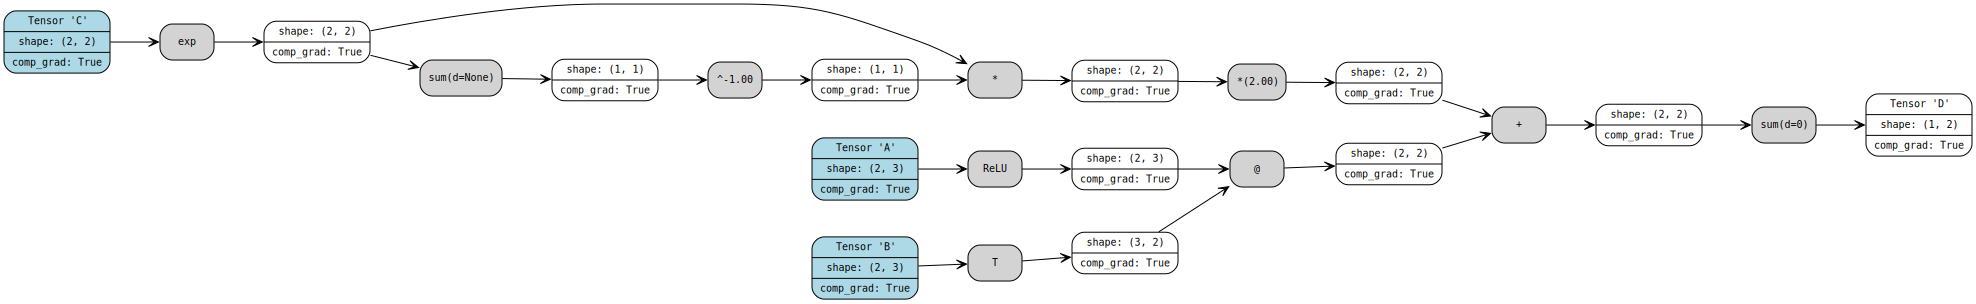

In [ ]:
a = sg.Tensor([[1, 2, 0], [1, 1, 3]], label="A")
b = sg.Tensor([[1, 1, 0], [1, 1, 0]], label="B")
c = sg.Tensor([[1, 2], [2, 3]], label="C")
d = sg.sum(2 * sg.softmax(c) + sg.relu(a) @ b.T, dim=0)
d.label = "D"
d.display_graph()

In [3]:
d.zero_grad()
d.backward()
print("D grad:\n", d.grad)
print("\nA grad:\n", a.grad)
print("\nB grad:\n", b.grad)
print("\nC grad:\n", c.grad)

D grad:
 [[1. 1.]]

A grad:
 [[2. 2. 0.]
 [2. 2. 0.]]

B grad:
 [[2. 3. 3.]
 [2. 3. 3.]]

C grad:
 [[6.59683323e-09 1.79320527e-08]
 [1.79320527e-08 4.87443724e-08]]


In [4]:
p = sg.Tensor([[1, 2, 0], [1, 1, 3]], label="P", comp_grad=False)
t = sg.Tensor([[1, 1, 0], [1, 1, 11]], label="T")
e = t @ p.T; e.label = "E"
e.display_graph()
e.zero_grad()
e.backward()
print(e)
print()
print("E grad:\n", e.grad)
print("\nP grad (should be None):\n", p.grad)
print("\nT grad:\n", t.grad)

Tensor 'E'
shape: (2, 2)
is_leaf: False
dtype: float32
comp_grad: True
values:
[[ 3.  2.]
 [ 3. 35.]]
grad:
[[1. 1.]
 [1. 1.]]

E grad:
 [[1. 1.]
 [1. 1.]]

P grad (should be None):
 None

T grad:
 [[2. 3. 3.]
 [2. 3. 3.]]


## Model Creation

In [5]:
class MicroModel(sg.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = sg.nn.Linear(3, 2, use_bias=True)
        self.act1 = sg.nn.ReLU()
        self.fc2 = sg.nn.Linear(2, 1, use_bias=True)
        self.act2 = sg.nn.Softmax(dim=1)
        self.fc3 = sg.nn.Linear(1, 1, use_bias=True)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

model = MicroModel()
pprint(model.parameters())

{'fc1.bias': <simplegrad.core.tensor.Tensor object at 0x10ed15910>,
 'fc1.weight': <simplegrad.core.tensor.Tensor object at 0x10ed15860>,
 'fc2.bias': <simplegrad.core.tensor.Tensor object at 0x10edb3250>,
 'fc2.weight': <simplegrad.core.tensor.Tensor object at 0x10edb22b0>,
 'fc3.bias': <simplegrad.core.tensor.Tensor object at 0x10edb34d0>,
 'fc3.weight': <simplegrad.core.tensor.Tensor object at 0x10edb3390>}


In [6]:
class AnotherModel(sg.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = MicroModel()
        self.layer2 = sg.nn.Linear(1, 2, use_bias=False)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x
    
another_model = AnotherModel()
pprint(another_model.parameters())

{'layer1.fc1.bias': <simplegrad.core.tensor.Tensor object at 0x10edb39d0>,
 'layer1.fc1.weight': <simplegrad.core.tensor.Tensor object at 0x10edb37f0>,
 'layer1.fc2.bias': <simplegrad.core.tensor.Tensor object at 0x10edb3c50>,
 'layer1.fc2.weight': <simplegrad.core.tensor.Tensor object at 0x10edb3b10>,
 'layer1.fc3.bias': <simplegrad.core.tensor.Tensor object at 0x10edb3ed0>,
 'layer1.fc3.weight': <simplegrad.core.tensor.Tensor object at 0x10edb3d90>,
 'layer2.weight': <simplegrad.core.tensor.Tensor object at 0x10edf8050>}


Tensor 'L'
shape: (1, 1)
is_leaf: False
dtype: float32
comp_grad: True
values:
[[-0.69601417]]
grad: None


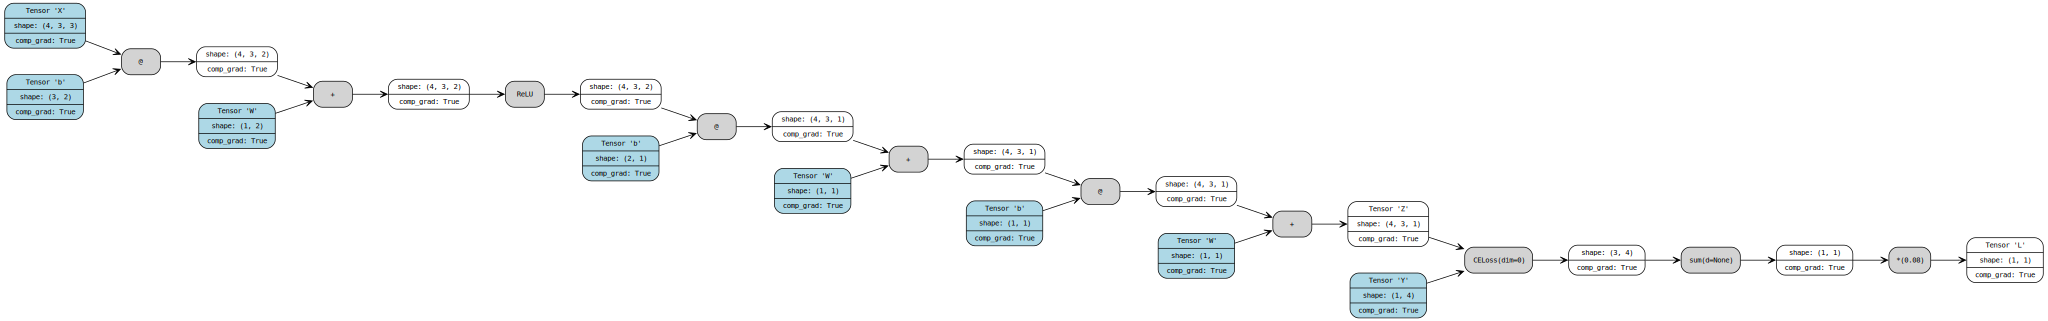

In [7]:
# 4 3x3 1-channel images
# 4 corresponding labels
batch_size = 4
x = sg.random(shape=(batch_size, 3, 3), label="X")
y = sg.random(shape=(batch_size,), label="Y")
z = model.forward(x); z.label = "Z"
loss = sg.ce_loss(z=z, y=y, dim=0, reduction='mean'); loss.label = "L"
print(loss)
loss.display_graph()